# Métodos Numéricos 2024 

## Guía 2: 2024-04-04 - Solución de ecuaciones de una variable

In [4]:
using Plots
using LaTeXStrings
using DataFrames # Recuerde instalar este paquete ingresando en una celda: using Pkg; Pkg.add("DataFrames")

LoadError: ArgumentError: Package LaTeXStrings not found in current path.
- Run `import Pkg; Pkg.add("LaTeXStrings")` to install the LaTeXStrings package.

In [55]:
using Pkg
Pkg.add("DataFrames")
using DataFrames

   Resolving package versions...
  No Changes to `/opt/julia/global-depot/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/global-depot/environments/v1.8/Manifest.toml`
[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
┌ Warning: Module SortingAlgorithms with build ID 8541192765040 is missing from the cache.
│ This may mean SortingAlgorithms [a2af1166-a08f-5f64-846c-94a0d3cef48c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
[ Info: Skipping precompilation since __precompile__(false). Importing DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0].
[ Info: Precompiling PooledArrays [2dfb63ee-cc39-5dd5-95bd-886bf059d720]
┌ Warning: Module DataAPI with build ID 8538440474511 is missing from the cache.
│ This may mean DataAPI [9a962f9c-6df0-11e9-0e5d-c546b8b5ee8a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
[ Info: Skipping precompilation since __precompile__(f

### Problema 1

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de la bisección**.
El programa debe tomar como datos de entrada:

* la función $f:\mathbb{R}\to \mathbb{R}$, 

* el intervalo inicial $[a,b]$, 

* la máxima tolerancia permitida $\varepsilon_x$ al error relativo $(p-x)/x$ de la aproximación $p$ de la raíz $x$ de $f$ en $[a,b]$,

* la máxima tolerancia permitida $\varepsilon_f$ al valor de $|f(p)|$,

* y el número máximo $n_{\max}$ de iteraciones permitidas.

El programa debe retornar una tupla con las siguientes componentes:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas $\varepsilon_x$ y $\varepsilon_f$,

* un vector de componentes $p_i$ que representan las aproximaciones a la raíz $x$ obtenidas por el algoritmo en sucesivas iteraciones $i=1,2,...,n$,

* un vector de componentes $f_i=f(p_i)$,

* un vector de componentes $c_i=|b_i-a_i|/2$ que representan cotas de los errores absolutos $|x-p_i|$,

* y un vector de componentes $r_i=c_i/|p_i|$ que representan estimaciones de los errores relativos $|x-p_i|/|x|$.

El programa debe deternerse si se cumple:

$$
(r_i<\varepsilon_x \;\; \text{AND} \;\; |f_i|<\varepsilon_f) \;\; \text{OR} \;\; i=n_{\max}
$$

El programa debe trabajar con números de precisión suficientemente alta como para obtener resultados con 12 cifras significativas en los reales (ej. `Float64`).

Con el programa desarrollado, Ud. debe:

1. Encontrar una aproximación a $\sqrt{3}$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello: 

    * Note que $\sqrt{3}$ es la raíz positiva de la ecuación $f(x)=x^2-3$.
    * Grafique $f(x)$ vs $x$ en el intervalo $[1,2]$ para determinar que tiene una raíz allí.
    * Utilice el programa desarrollado para calcular los vectores de aproximaciones y errores.
    * Imprima una lista con los valores $i$, $p_i$, $f_i$, $c_i$ y $r_i$ para $i=1,...,n$, utilizando el paquete `DataFrames`.
    * Grafique $p_i$ vs $i$ usando puntos (en vez de una línea contínua).
    * Grafique $|f_i|$ vs $i$ usando puntos, escala logarítmica en el eje $y$ y lineal en el eje $x$.
    * En una misma figura, grafique con puntos de un color los errores absolutos $c_i$ vs $i$ y con puntos de otro color los errores relativos $r_i$ vs $i$, utilizando escala logarítimica en el eje $y$ y lineal en el eje $x$. 
    * Responda: 
        * Cuanto vale la presunta mejor aproximación $p_n$? 
        * Cuántas iteraciones fueron necesarias?
        * Cuales son los valores exactos de los errores absoluto y relativo que se obtienen de comparando el resultado $p_n$ con el "analítico"?   
    
2. Encontrar la menor solución positiva de la ecuación $g(x)=\tan(x)-2x$ con un error relativo en $x$ y absoluto en $y$ menor a $10^{-5}$. Para ello, repita lo realizado en el inciso anterior considerando el intérvalo $x\in [0.8,1.4]$, pero exceptuando el último item ya que no podemos calcular el valor analítico en este caso. 

**IMPORTANTE:** Recuerde poner títulos, etiquetas a los ejes y leyendas para las curvas o puntos de los gráficos.

In [50]:
#PROGRAMA 1
#la función f:ℝ→ℝ
#el intervalo inicial [a,b]
#la máxima tolerancia permitida εx al error relativo (p−x)/x de la aproximación p de la raíz x de f en [a,b]
#la máxima tolerancia permitida εf al valor de |f(p)|
#y el número máximo nmax de iteraciones permitidas.


function biseccion(f,intervalo,e_x=1e-5,e_f=1e-5,n_max=100)
    a,b = intervalo
    @assert a<=b
    fa = f(a)
    @assert fa*f(b) < 0
    vect_pi = zeros(n_max) #vector de aprox de p_i
    vect_f = zeros(n_max) #vector de valores de f(p_i)
    vect_eabs = zeros(n_max) #vector de estim de errores absolutos de x
    vect_erel = zeros(n_max) #vector de estim de errores relativos de x
    
    for i in 1:n_max
        p_i =((b-a)/2) + a 
        f_pi = f(p_i)
        error_abs = (b-a)/2 #estimacion error abs
        error_rel = abs(error_abs/p_i)
        
        vect_pi[i]= p_i
        vect_f[i]= f_pi
        vect_eabs[i] = error_abs
        vect_erel[i] = error_rel
        
         if error_abs <= e_x && abs(f_pi) <= e_f
            return true,vect_pi[1:i],vect_f[1:i],vect_eabs[1:i],vect_erel[1:i] 
        end
        if fa*f_pi < 0.0
            b = p_i
        else
            a = p_i  
        end
    end
    return false,vect_pi,vect_f,vect_eabs,vect_erel
end   
            
    

biseccion (generic function with 4 methods)

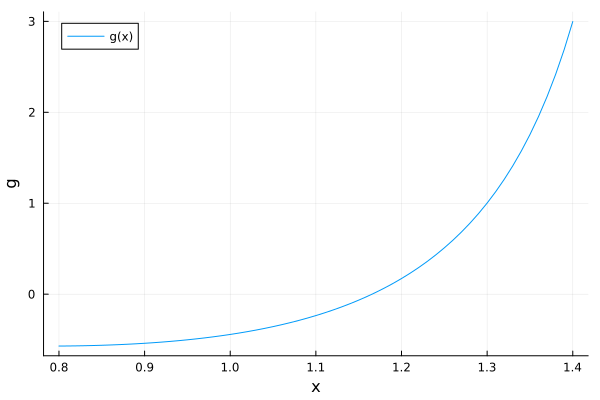

In [58]:
g(x) = x^2-3
g(x)= tan(x)-2x

plot(g,0.8:0.01:1.4,xlabel ="x",ylabel = "g", label = "g(x)")

In [59]:
conv,vect_pi,vect_f,vect_eabs,vect_erel = biseccion(g,[0.8,1.4])
data = DataFrame(p_i = vect_pi, f_i= vect_f,error_abs = vect_eabs,error_rel = vect_erel)

Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,1.1,-0.23524,0.3,0.272727
2,1.25,0.50957,0.15,0.12
3,1.175,0.0432212,0.075,0.0638298
4,1.1375,-0.113383,0.0375,0.032967
5,1.15625,-0.0400159,0.01875,0.0162162
6,1.16562,0.000283024,0.009375,0.0080429
7,1.16094,-0.020185,0.0046875,0.00403769
8,1.16328,-0.010032,0.00234375,0.00201478
9,1.16445,-0.00489492,0.00117188,0.00100637


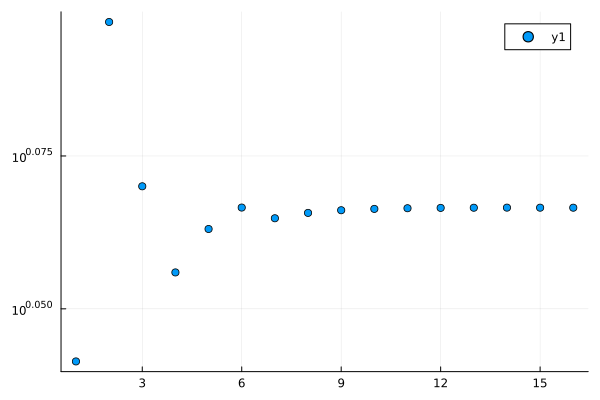

In [73]:
n = length(vect_pi)
scatter(1:n,i->abs(vect_pi[i]),yscale =:log10)

### Problema 2

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de Newton** (también conocido como Newton-Raphson).
El programa debe tomar como datos de entrada la función $f:\mathbb{R}\to \mathbb{R}$, su derivada $f':\mathbb{R}\to \mathbb{R}$, una estimación inicial $p_1$ de la raíz $x$, la tolerancia $\varepsilon_x$ a la estimación $r_i:=\frac{|p_{i+1} - p_{i}|}{|p_{i+1}|}$ del error relativo $|x-p_i|/|x|$ en la iteración $i$ para $i=1,2,...,n$, la tolerancia en $\varepsilon_f$ al valor absoluto de $f_i:=f(p_{i})$ y el número máximo de iteraciones permitido $n_{\max}$.
El programa debe retornar una tupla con las siguientes componentes:

* Un booleano indicando si el algoritmo convergió.

* Un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizado por el programa.

* Un vector de valores $f_i:=f(p_i)$.

* Un vector de estimaciones $c_i:=|p_{i+1}-p_i|$ de errores absolutos $|x-p_i|$.

* Un vector de estimaciones $r_i:=c_i/|p_{i+1}|$ de errores relativos $|x-p_i|/|x|$.

El programa debe finalizar en la iteración $n$-ésima que satisfaga por vez primera:
$$
\left( r_n < \varepsilon_x \qquad \text{AND} \qquad 
f_n < \varepsilon_f \right) \qquad \text{OR} \qquad
n = n_{\max}
$$
y debe poder utlizar 13 cifras significativas para las variables reales (ej. `Float64`).

Utilice este programa para resolver los **incisos 1 y 2** del **problema 1**, usando $p_1=1$ en ambos casos. No hace falta graficar $f(x)$ vs $x$. Compare la cantidad de iteraciones $n$, la cantidad de evaluaciones de la función $f$ y su derivada $f'$ en los dos métodos.

### Problema 3

Compute y grafique en escala log-lineal el error relativo estimado $r_i:=|p_{i+1}-p_i|/|p_{i+1}|$ vs $i$ de las aproximaciones de $\sqrt{3}$ con los métodos de la **bisección** y **Newton**, partiendo del intervalo $[0,2.5]$ y del valor inicial $p_1=2.5$, respectivamente. 
Utilice en ambos casos tolerancias $\varepsilon_x=\varepsilon_f=10^{-10}$.

### Problema 4

Un objeto en caída vertical en el aire está sujeto a la fuerza de gravedad y a la resistencia del aire. Si un objeto de masa $m$ es dejado caer desde una altura $h_0$, su altura luego de $t$ segundos está dada por:
$$
h(t) = h_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-kt/m}\right)
$$
donde $g=9.8\, m/s^2$ y $k$ representa el coeficiente de resistencia del aire en $kg / s$.
Suponga que $h_0 = 10\,m$, $m=0.1\,kg$, y $k=0.149\,kg/s$.

Grafique $h(t)$ para analizar su comportamiento.

Encuentre, con una precisión de $0.01\,s$, el tiempo que le toma a este objeto llegar al suelo. 
Utilice el método de **bisección** y el de **Newton**.

### Problema 5

Encuentre la solución a la ecuación 
$$
x - \cos x = 0 
$$
en el intervalo $[0, \pi/2]$ con un error relativo $\varepsilon_x=10^{-10}$ utilizando:

1. el método de la **secante** con $p_1=0.0$ y $p_2=\pi/2$,

2. el método de **regula falsi** con $a=0.0$ y $b=\pi/2$,

3. el método de **bisección** con $a=0.0$ y $b=\pi/2$ y

4. el método de **Newton** con $p_1=1$.

Graficar el error relativo $r_i$ retornado por cada método vs el número de iteración $i$. Utilice las escalas log-lineal (es decir, logarítmica en el eje $y$ y lineal en el $x$).

### Problema 6

Dado el siguiente polinomio, $p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5$.

Grafique y observe que posee una única raíz real positiva. Encuentre la misma utilizando:

1. El método de bisección. Elija el intervalo $[a,b]$ utilizando el **teorema de las cotas de Cauchy** que acota la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio utilizando el **algoritmo de Horner**.

2. El método de Newton-Raphson. Elija el valor inicial utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio y su derivada utilizando el **algoritmo de Horner**.

**Teorema de las cotas de Cauchy**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, todas las raices de $p$ se encuentran en el intervalo $[-(M+1),M+1]$ para $M = \max\left\{\frac{|a_0|}{|a_n|},\frac{|a_0|}{|a_n|},...,\frac{|a_{n-1}|}{|a_n|}\right\}$.

**Algoritmo de Horner**

Cualquier polinomio
$$
p(x)=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
$$
puede ser reescrito como
$$
p(x)=a_0+x(a_1+x(a_2+...+x(a_{n-1}+xa_n)...))
$$
El algoritmo de Horner consiste en calcular $p(x)$ para un valor dado de $x$ sacando ventaja de la anterior expresión, ya que nos evita tener que calcular potencias $x^2, x^3, ..., x^n$ lo cual resulta numericamente costozo y tendiente a introducir errores numéricos indeseables.
Notar que
$$
p'(x)=a_1+2a_2x+3a_3x^2+...+(n-1)a_{n-1}x^{n-2}+na_nx^{n-1}
$$
lo cual se reduce a
$$
p'(x)=a_1+x(2a_2+x(3a_3+...+x((n-1)a_{n-1}+xna_n))+...)))
$$

## Ejercicios Complementarios

### Problema C.1

Cree una función para calcular una aproximación a la raíz cúbica $x=R^{1/3}$ de un número $R$ positivo. La función debe tomar como entrada el número $R$, la aproximación inicial $x_0$, el error máximo permitido $\epsilon$, y debe utilizar el algoritmo de de Newton-Raphson para calcular la raíz. Ponga a prueba la función con $R=40$, $x_0=20$ y $\epsilon=10^{-5}$